Let's import the necessary libraries that will be used for this project. The following libraries will be used:

* pandas - for reading our dataset and processing it
* numpy - for processing the model predictions
* matplotlib - for plotting the training and validation curves
* tensorflow - for building our model
* scikit-learn - for data preprocessing and model evaluation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Getting the data
Let's now read the data after importing the necessary libraries.

In [2]:
# Load dataset
box_1 = pd.read_csv('box_1_smoothened.csv')
box_2 = pd.read_csv('box_2_smoothened.csv')
box_3 = pd.read_csv('box_3_smoothened.csv')
box_4 = pd.read_csv('box_4_smoothened.csv')

Combine the data to make one dataset.

In [3]:
data = pd.concat([box_1, box_2, box_3, box_4], axis='index')

Drop unused columns.

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

Then, rearrange the columns, putting the label as the last column.

In [5]:
cols = data.columns.tolist()
cols = cols[1:] + ['label']
cols

['mq2_smooth',
 'mq3_smooth',
 'mq7_smooth',
 'mq9_smooth',
 'mq135_smooth',
 'label']

In [6]:
data = data[cols]
data

,mq2_smooth,mq3_smooth,mq7_smooth,mq9_smooth,mq135_smooth,label
0,81.150000,862.906333,0.059000,0.145333,0.465000,0
1,81.097333,862.944333,0.041667,0.109000,0.417000,0
2,81.067667,862.990667,0.035333,0.091333,0.379667,0
3,81.050000,863.044000,0.031667,0.083333,0.353000,0
4,81.041000,863.104333,0.031667,0.083000,0.330667,0
...,...,...,...,...,...,...
192238,536.118333,874.291667,31.069333,61.200333,483.998333,1
192239,536.120667,874.284333,31.068333,61.201333,483.998667,1
192240,536.117667,874.276333,31.072667,61.193000,484.002000,1
192241,536.117000,874.272000,31.071667,61.193333,484.003333,1


## Model Building

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3)

In [8]:
train_data.shape

(550613, 5)

Build the model.

In [9]:
cacao_ferm_classifier = Sequential([
    Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(.2),
    Dense(128, activation='relu'),
    Dropout(.2),
    Dense(128, activation='relu'),
    Dropout(.2),
    Dense(1, activation='sigmoid')
])

Compile the model.

In [10]:
cacao_ferm_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model.

In [11]:
history = cacao_ferm_classifier.fit(train_data, train_labels, validation_data=((test_data, test_labels)), epochs=10, batch_size=64, verbose=1)

Epoch 1/10
8604/8604 [==============================] - 48s 5ms/step - loss: 0.1975 - accuracy: 0.9434 - val_loss: 0.0089 - val_accuracy: 0.9989
Epoch 2/10
8604/8604 [==============================] - 44s 5ms/step - loss: 0.0274 - accuracy: 0.9919 - val_loss: 0.0094 - val_accuracy: 0.9980
Epoch 3/10
8604/8604 [==============================] - 44s 5ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0069 - val_accuracy: 0.9989
Epoch 4/10
8604/8604 [==============================] - 44s 5ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0048 - val_accuracy: 0.9974
Epoch 5/10
8604/8604 [==============================] - 44s 5ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0086 - val_accuracy: 0.9964
Epoch 6/10
8604/8604 [==============================] - 43s 5ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0036 - val_accuracy: 0.9987
Epoch 7/10
8604/8604 [==============================] - 44s 5ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.0033 - val_ac

Plot the model accuracy and loss.

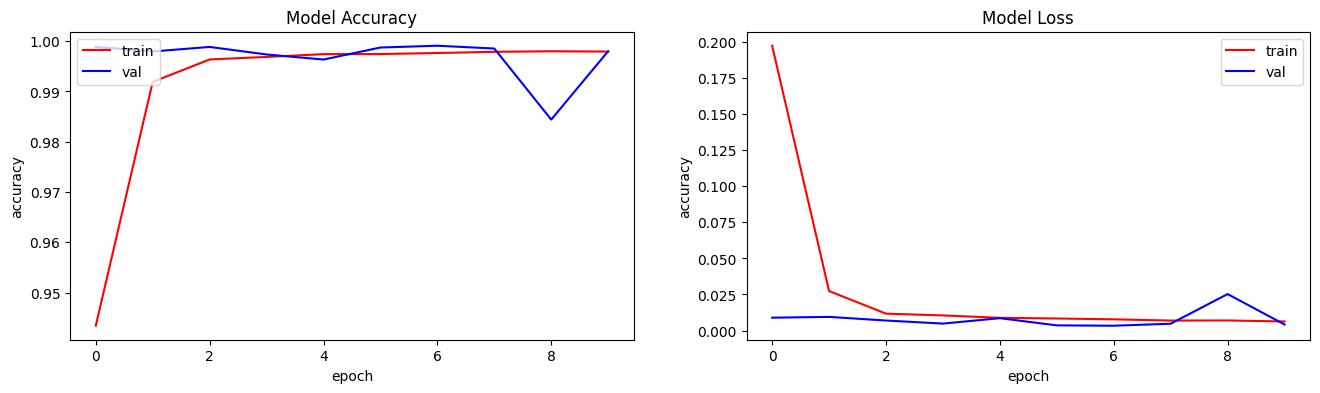

In [12]:
# Create a 16" x 4" plot board
plt.figure(figsize=(16, 4))

# Plot the training and validation accuracy in the first plot space (1 x 2 plots)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color="red")
plt.plot(history.history['val_accuracy'], color="blue")
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# Plot the training and validation loss in the second plot space (1 x 2 plots)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color="red")
plt.plot(history.history['val_loss'], color="blue")
plt.title('Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

# Show the plots
plt.show()

# Model Evaluation

Make predictions.

In [13]:
preds = cacao_ferm_classifier.predict(test_data)
test_acc = accuracy_score(test_labels, preds.astype(np.int32))

test_acc

7375/7375 [==============================] - 14s 2ms/step


0.9397780292147117

In [16]:
loss, acc = cacao_ferm_classifier.evaluate(test_data, test_labels, verbose=2)
print("Accuracy: {:5.2f}%".format(100 * acc))

7375/7375 - 12s - loss: 0.0042 - accuracy: 0.9980 - 12s/epoch - 2ms/step
Accuracy: 99.80%


Create classification report.

In [14]:
print(classification_report(test_labels, preds.astype(np.int32)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    166777
           1       1.00      0.79      0.89     69200

    accuracy                           0.94    235977
   macro avg       0.96      0.90      0.92    235977
weighted avg       0.94      0.94      0.94    235977



Save the model.

In [15]:
cacao_ferm_classifier.save('./model/dnn_cacao_ferm_classifier')

INFO:tensorflow:Assets written to: ./model/dnn_cacao_ferm_classifier\assets


INFO:tensorflow:Assets written to: ./model/dnn_cacao_ferm_classifier\assets
